In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import json
from urllib.request import Request, urlopen, HTTPError
import operator
from collections import OrderedDict


In [3]:
#Get dictionary items sorted by datetime
def dict_to_sorted_lists(dictionary):
    dates = list(dictionary.keys())
    dates.sort()
    values = []
    nrOfSensors = []
    for date in dates:
        values.append(dictionary[date][0])
        nrOfSensors.append(dictionary[date][1])
    return dates, values, nrOfSensors

In [4]:
#Remove nonetypes
def remove_nonetypes(values, dates):
    newVals = []
    newDates = []
    for i, val in enumerate(values):
        if not (val is None):
            newVals.append(val)
            newDates.append(dates[i])
    
    return newVals, newDates

#Remove outliers
def remove_anomalies(values, dates):
    # Set upper and lower limit to 3 standard deviation
    newVals = []
    newDates = []
    clear = remove_nonetypes(values, dates)
    values = clear[0]
    dates = clear[1]
    
    data_std = np.std(values)
    data_mean = np.mean(values)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    # Generate outliers
    for i, val in enumerate(values):
        if not (val > upper_limit or val < lower_limit):
            newVals.append(val)
            newDates.append(dates[i])
            
    return values, dates


In [5]:
#Remove extremes (weird values)
def remove_values_above(values, dates, limit, startVal):
    newVals = []
    newDates = []
    for i, val in enumerate(values):
        if val <= limit:
            newVals.append(val)
            newDates.append(dates[i])
    
    return newVals, newDates

In [6]:
#Detects if a sensor's data is faulty
def detect_faulty_sensor(values):
    val_len = len(values)
    if sum(i > 200 for i in values) > ((5/100)*val_len):
        return True


In [7]:
#Getting the ids of all the sensors in Brussels

sample_data_city = pd.read_json("https://data.influencair.be/cityList.json")

brusselsData = []
for d in sample_data_city.data :
    if(d['name'] == 'Brussels'):
        brusselsData = d
        
        
brusselsSensorList = brusselsData['data']

In [8]:
#Add it to chain at key that needs to be averaged later
def add_to_averages(dates, values, averages):
    for i, val in enumerate(values):
        if dates[i] in averages:
            averages[dates[i]].append(val)
        else:
            averages[dates[i]] = [val]
    return averages

In [9]:
#Average/mean of chains (list) at each key
def average_dictionary(dictionary):
    for x in dictionary:
        dictionary[x] = [sum(dictionary[x])/ len(dictionary[x]), len(dictionary[x])]
    return dictionary

Number of sensors in Brussels:  251
PM2.5 --   Sensor:  1206   NrOfDates:  758   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  1462   NrOfDates:  801   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  3995   NrOfDates:  735   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  5432   NrOfDates:  549   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-08 00:00:00
PM2.5 --   Sensor:  7293   NrOfDates:  304   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM2.5 --   Sensor:  7304   NrOfDates:  439   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  7346   NrOfDates:  346   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM2.5 --   Sensor:  7352   NrOfDates:  587   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  7361   NrOfDates:  331   StartDate:  2019-03-05 00:00:00   EndDate:  201

PM2.5 --   Sensor:  8791   NrOfDates:  504   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-14 00:00:00
PM2.5 --   Sensor:  1919   NrOfDates:  802   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  7322   NrOfDates:  569   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  9791   NrOfDates:  426   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM2.5 --   Sensor:  7324   NrOfDates:  431   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  11274   NrOfDates:  477   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  8548   NrOfDates:  499   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  13985   NrOfDates:  404   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Sensor:  14171   NrOfDates:  383   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM2.5 --   Senso

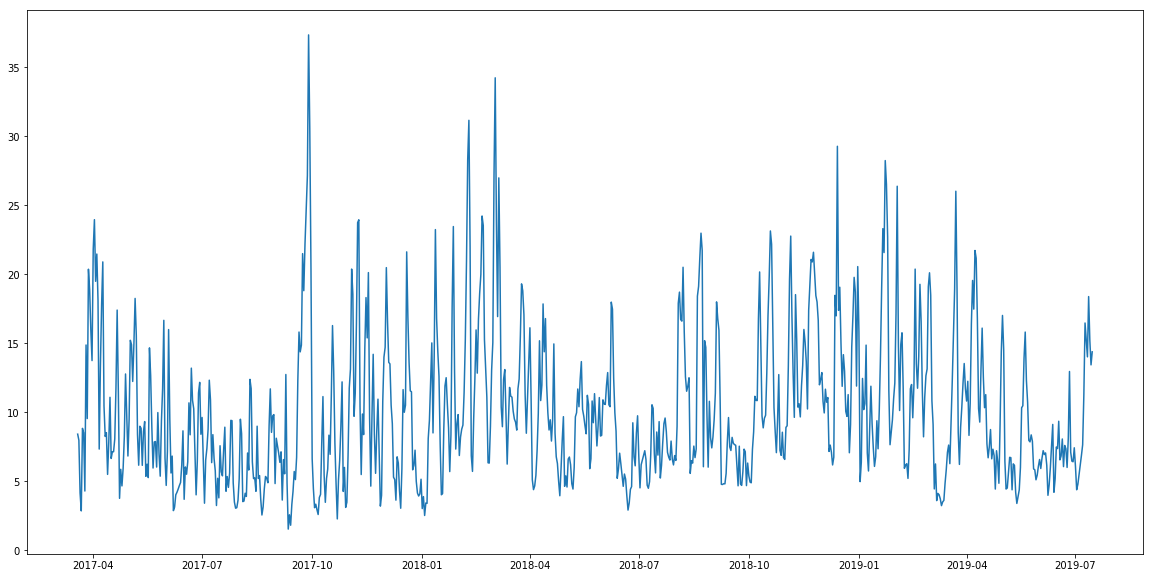

PM10 --   Sensor:  1206   NrOfDates:  758   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  1462   NrOfDates:  802   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  3995   NrOfDates:  736   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  5432   NrOfDates:  550   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-08 00:00:00
PM10 --   Sensor:  7293   NrOfDates:  304   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM10 --   Sensor:  7304   NrOfDates:  439   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  7346   NrOfDates:  346   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM10 --   Sensor:  7352   NrOfDates:  590   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  7361   NrOfDates:  331   StartDate:  2019-03-05 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  7955   Nr

PM10 --   Sensor:  7322   NrOfDates:  570   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  9791   NrOfDates:  426   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM10 --   Sensor:  7324   NrOfDates:  431   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  11274   NrOfDates:  478   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  8548   NrOfDates:  499   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  13985   NrOfDates:  405   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  14171   NrOfDates:  384   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  14249   NrOfDates:  372   StartDate:  2018-07-30 00:00:00   EndDate:  2018-07-29 00:00:00
PM10 --   Sensor:  5442   NrOfDates:  495   StartDate:  2018-07-30 00:00:00   EndDate:  2019-07-15 00:00:00
PM10 --   Sensor:  14408

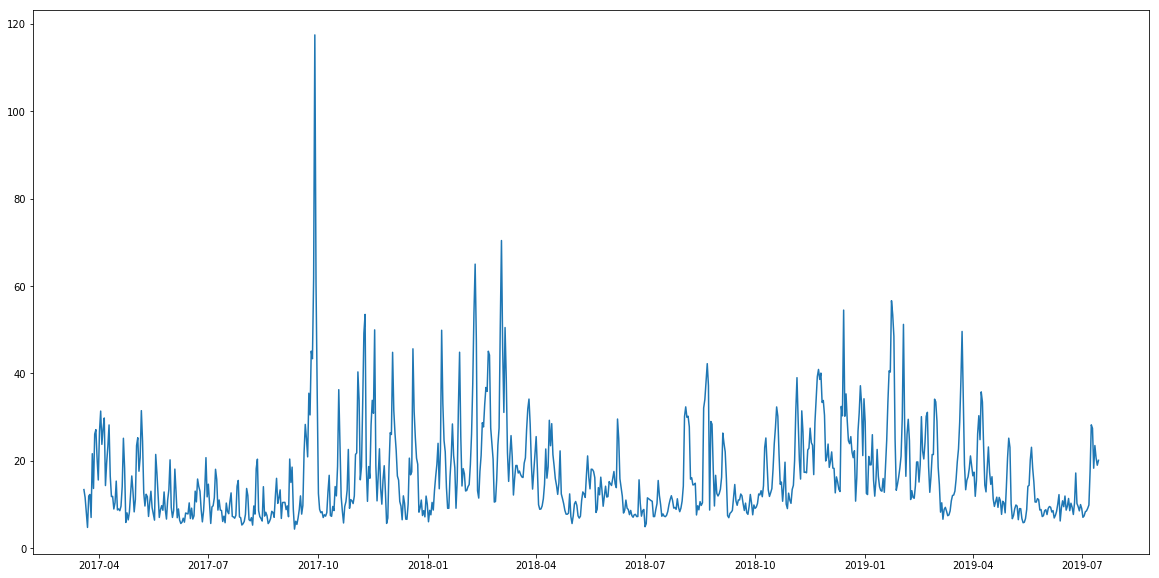

In [10]:
#Get the daily averages data from all the Brussels sensors and take the average for each date of all sensors
print("Number of sensors in Brussels: ", len(brusselsSensorList))
plt.rcParams['figure.figsize'] = 20, 10

#GET FROM URL

def get_url_data(url = ""):
    try:
        request = Request(url, headers = {'User-Agent' :\
            "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36"})

        response = urlopen(request)
        data = json.loads(response.read())
        return data
    except HTTPError:
        return None
    
#------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

#PM 2.5
missingDataSensors = 0
missingSensors = []
missingUrls = []
failedUrlRequests = 0
validSensors = 0


averagesDictionary = {} #to track the averages

for sensor in brusselsSensorList :
    url = "https://history.influencair.be/dailyAverage/PM25/" + str(sensor) + "/data.json"
    data = get_url_data(url)
    if data != None:
        nrOfDates = len(data['dailyAverages'])
        if nrOfDates > 0 :
            dates = [None] * nrOfDates
            values = [None] * nrOfDates
            startdate = 0
            enddate = 0
            for i, val in enumerate(data['dailyAverages']):
                dates[i] = datetime.strptime(val['date'], '%Y-%m-%d')
                if i == 0 :
                    startdate = dates[i]
                if i == nrOfDates - 1:
                    enddate = dates[i]
                values[i] = val['value']
            #OUTLIER DETECTION    
            outliersRemoved = remove_anomalies(values, dates)
            values = outliersRemoved[0]
            dates = outliersRemoved[1]
            nrOfDates = len(dates)
            #-----------------------------------------------
            #REMOVE NONTYPES
            clearedNontypes = remove_nonetypes(values, dates)
            values = clearedNontypes[0]
            dates = clearedNontypes[1]
            #-----------------------------------------------
            #DETECT/REMOVE FAULTY SENSORS
            if not detect_faulty_sensor(values):
                #cleared = remove_values_above(values, dates, 200, 0)
                #values = cleared[0]
                #dates = cleared[1]
                averagesDictionary = add_to_averages(dates, values, averagesDictionary)
                validSensors += 1
                #plt.plot(dates, values)
                print("PM2.5 -- ", " Sensor: ", sensor, "  NrOfDates: ", 
                      nrOfDates, "  StartDate: ", startdate, "  EndDate: ", enddate)
                
        else: 
            missingDataSensors += 1
            missingSensors.append(sensor)
    else: failedUrlRequests += 1
print("Missing Data Sensors for pm2.5:", missingDataSensors,missingSensors)
print("Failed Url requests for pm2.5:", failedUrlRequests)
print("Valid sensors for pm2.5: ", validSensors)
averagesDictionary = average_dictionary(averagesDictionary)
#print(averagesDictionary)
sortedAveragesLists = dict_to_sorted_lists(averagesDictionary)
average_dates = sortedAveragesLists[0]
average_values = sortedAveragesLists[1]
average_nrOfSensors = sortedAveragesLists[2]
pm25dates = average_dates
pm25values = average_values
pm25nrOfSensors = average_nrOfSensors
plt.plot(average_dates, average_values)
plt.show()
#---------------------------------------------------------------------------------------------------------------------------

#PM 10

missingDataSensors = 0
missingSensors = []
missingUrls = []
failedUrlRequests = 0
validSensors = 0

averagesDictionary = {} #to track the averages

for sensor in brusselsSensorList :
    url = "https://history.influencair.be/dailyAverage/PM10/" + str(sensor) + "/data.json"
    data = get_url_data(url)
    if data != None:
        nrOfDates = len(data['dailyAverages'])
        if nrOfDates > 0 :
            dates = [None] * nrOfDates
            values = [None] * nrOfDates
            startdate = 0
            enddate = 0
            for i, val in enumerate(data['dailyAverages']):
                dates[i] = datetime.strptime(val['date'], '%Y-%m-%d')
                if i == 0 :
                    startdate = dates[i]
                if i == nrOfDates - 1:
                    enddate = dates[i]
                values[i] = val['value']
            #OUTLIER DETECTION    
            outliersRemoved = remove_anomalies(values, dates)
            values = outliersRemoved[0]
            dates = outliersRemoved[1]
            nrOfDates = len(dates)
            #-----------------------------------------------
            #REMOVE NONTYPES
            clearedNontypes = remove_nonetypes(values, dates)
            values = clearedNontypes[0]
            dates = clearedNontypes[1]
            #-----------------------------------------------
            #DETECT/REMOVE FAULTY SENSORS
            if not detect_faulty_sensor(values):
                #cleared = remove_values_above(values, dates, 200, 0)
                #values = cleared[0]
                #dates = cleared[1]
                validSensors += 1
                averagesDictionary = add_to_averages(dates, values, averagesDictionary)
                #plt.plot(dates, values)
                print("PM10 -- ", " Sensor: ", sensor, "  NrOfDates: ", 
                      nrOfDates, "  StartDate: ", startdate, "  EndDate: ", enddate)
                
        else: 
            missingDataSensors += 1
            missingSensors.append(sensor)
    else: failedUrlRequests += 1
print("Missing Data Sensors for pm10:", missingDataSensors,missingSensors)
print("Failed Url requests for pm10:", failedUrlRequests)
print("Valid sensors for pm10: ", validSensors)
averagesDictionary = average_dictionary(averagesDictionary)
#print(averagesDictionary)
sortedAveragesLists = dict_to_sorted_lists(averagesDictionary)
average_dates = sortedAveragesLists[0]
average_values = sortedAveragesLists[1]
average_nrOfSensors = sortedAveragesLists[2]
pm10dates = average_dates
pm10values = average_values
pm10nrOfSensors = average_nrOfSensors
plt.plot(average_dates, average_values)
plt.show()


In [11]:
#Export daily average data to json starting from january 2018
pm25datestrings = [pm25datestring.strftime('%d-%m-%Y') for pm25datestring in pm25dates]
pm10datestrings = [pm10datestring.strftime('%d-%m-%Y') for pm10datestring in pm25dates]


pm25valuepairs = []
for i, date in enumerate(pm25datestrings):
    if not date.endswith('7'):
        pm25valuepairs.append({'Date': date, 'Value': pm25values[i], 'NrOfSensors': pm25nrOfSensors[i]})
    
pm10valuepairs = []
for i, date in enumerate(pm10datestrings):
    if not date.endswith('7'):
        pm10valuepairs.append({'Date': date, 'Value': pm10values[i], 'NrOfSensors': pm10nrOfSensors[i]})
    
data = {}
data['pm2.5'] = pm25valuepairs
data['pm10'] = pm10valuepairs


with open('dailyAverages_export.json', 'w') as outfile:  
    json.dump(data, outfile, indent=4)

In [12]:
#Get the daily averages data from all the Brussels sensors
print("Number of sensors in Brussels: ", len(brusselsSensorList))
plt.rcParams['figure.figsize'] = 20, 10

#PM 2.5
missingDataSensors = 0
missingSensors = []
missingUrls = []
failedUrlRequests = 0
validSensors = 0


sensorDataDict = {}

for sensor in brusselsSensorList :
    url = "https://history.influencair.be/dailyAverage/PM25/" + str(sensor) + "/data.json"
    data = get_url_data(url)
    if data != None:
        nrOfDates = len(data['dailyAverages'])
        if nrOfDates > 0 :
            dates = [None] * nrOfDates
            values = [None] * nrOfDates
            startdate = 0
            enddate = 0
            for i, val in enumerate(data['dailyAverages']):
                dates[i] = datetime.strptime(val['date'], '%Y-%m-%d')
                if i == 0 :
                    startdate = dates[i]
                if i == nrOfDates - 1:
                    enddate = dates[i]
                values[i] = val['value']
            #OUTLIER DETECTION    
            #outliersRemoved = remove_anomalies(values, dates)
            #values = outliersRemoved[0]
            #dates = outliersRemoved[1]
            #nrOfDates = len(dates)
            #-----------------------------------------------
            #REMOVE NONTYPES
            clearedNontypes = remove_nonetypes(values, dates)
            values = clearedNontypes[0]
            dates = clearedNontypes[1]
            #-----------------------------------------------
            #DETECT/REMOVE FAULTY SENSORS
            if not detect_faulty_sensor(values):
                #cleared = remove_values_above(values, dates, 200, 0)
                #values = cleared[0]
                #dates = cleared[1]
                #averagesDictionary = add_to_averages(dates, values, averagesDictionary)
                sensorDataDict[sensor] = dates, values
                validSensors += 1
                #plt.plot(dates, values)
                
        else: 
            missingDataSensors += 1
            missingSensors.append(sensor)
    else: failedUrlRequests += 1
print("Missing Data Sensors for pm2.5:", missingDataSensors,missingSensors)
print("Failed Url requests for pm2.5:", failedUrlRequests)
print("Valid sensors for pm2.5: ", validSensors)

#---------------------------------------------------------------------------------------------------------------------------




Number of sensors in Brussels:  251
Missing Data Sensors for pm2.5: 137 [1917, 1962, 2941, 3590, 4787, 5433, 5434, 5435, 5439, 5447, 5482, 6625, 7290, 7307, 7311, 7317, 7329, 7339, 7344, 7349, 7353, 7355, 7358, 9345, 8405, 8420, 8664, 8667, 8668, 8669, 9127, 9129, 9361, 9640, 9642, 9690, 9855, 9857, 9967, 10099, 10109, 10125, 10141, 10188, 10195, 10223, 10482, 10496, 10498, 10505, 10506, 10708, 10744, 10905, 10952, 10972, 11055, 11093, 11196, 11365, 11379, 11381, 11385, 11389, 11417, 11423, 11436, 11450, 11484, 11517, 11555, 11594, 11597, 11647, 11676, 11678, 11702, 11718, 11722, 11723, 11729, 11748, 11760, 11936, 11947, 11967, 12017, 12027, 12061, 12089, 12097, 12126, 12244, 12311, 12355, 12564, 12949, 12983, 13021, 13045, 13140, 13458, 13491, 13581, 13594, 13600, 13667, 13671, 13679, 13705, 13873, 11605, 7366, 11654, 8678, 8680, 12967, 13960, 7121, 5446, 14293, 14315, 14339, 14493, 14533, 13187, 14843, 14873, 14979, 14983, 15231, 15658, 15692, 15720, 11979, 9699, 16046]
Failed Url re

In [14]:
#Export daily average data per sensor to json starting from january 2018
for i, (k, v) in enumerate(sensorDataDict.items()):
    stringDates = [datestring.strftime('%d-%m-%Y') for datestring in v[0]]
    values = v[1]
    valuePairs = []
    for j, date in enumerate(stringDates):
        if not date.endswith('7'):
            valuePairs.append({'Date': date, 'Value': values[j]})
    sensorDataDict[k] = valuePairs
    sensorDataDict[k].sort(key=lambda x: datetime.strptime(x['Date'], '%d-%m-%Y'))
    
with open('dailyAveragesPerSensor_export.json', 'w') as outfile:  
    json.dump(sensorDataDict, outfile, indent=4)
    
